# Ames Housing Dataset - Exhaustive Exploratory Data Analysis

This notebook performs comprehensive EDA on the Ames Housing dataset for house price prediction.

## 1. Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import norm, skew
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
# Load the dataset
df = pd.read_csv('datasets/AmesHousing.csv')
print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")

Dataset loaded successfully!
Shape: (2930, 82)


## 2. Initial Data Overview

In [3]:
# Basic information about the dataset
print("=== DATASET OVERVIEW ===")
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]:,}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Duplicate rows: {df.duplicated().sum():,}")

=== DATASET OVERVIEW ===
Number of rows: 2,930
Number of columns: 82
Memory usage: 7.76 MB
Duplicate rows: 0


In [ ]:
# Display first few rows
print("=== FIRST 5 ROWS ===")
df.head()

=== FIRST 5 ROWS ===


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2001,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,616.0,Unf,0.0,722.0,1338.0,GasA,Ex,Y,SBrkr,1338,0,0,1338,1.0,0.0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,582.0,TA,TA,Y,0,0,170,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1995,1996,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1180.0,Unf,0.0,415.0,1595.0,GasA,Ex,Y,SBrkr,1616,0,0,1616,1.

In [8]:
# Display last few rows
print("=== LAST 5 ROWS ===")
df.tail()

=== LAST 5 ROWS ===


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,NaN,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1974,1975,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,Gd,TA,Av,ALQ,1071.0,LwQ,123.0,195.0,1389.0,GasA,Gd,Y,SBrkr,1389,0,0,1389,1.0,0.0,1,0,2,1,TA,6,Typ,1,TA,Attchd,1975.0,RFn,2.0,418.0,TA,TA,Y,240,38,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000
2929,2930,924151050,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,188000


In [9]:
# Column names and data types
print("=== COLUMN INFORMATION ===")
df.info()

=== COLUMN INFORMATION ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   

In [10]:
# Data types summary
print("=== DATA TYPES SUMMARY ===")
dtype_counts = df.dtypes.value_counts()
print(dtype_counts)

print("\n=== NUMERICAL vs CATEGORICAL COLUMNS ===")
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns: {len(numerical_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")

print(f"\nNumerical columns: {numerical_cols}")
print(f"\nCategorical columns: {categorical_cols}")

=== DATA TYPES SUMMARY ===
object     43
int64      28
float64    11
Name: count, dtype: int64

=== NUMERICAL vs CATEGORICAL COLUMNS ===
Numerical columns: 39
Categorical columns: 43

Numerical columns: ['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']

Categorical columns: ['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Ro

## 3. Target Variable Analysis (SalePrice)

In [11]:
# Basic statistics for SalePrice
print("=== SALEPRICE STATISTICS ===")
print(df['SalePrice'].describe())

print("\n=== ADDITIONAL STATISTICS ===")
print(f"Skewness: {df['SalePrice'].skew():.4f}")
print(f"Kurtosis: {df['SalePrice'].kurtosis():.4f}")
print(f"Range: ${df['SalePrice'].min():,.0f} - ${df['SalePrice'].max():,.0f}")
print(f"IQR: ${df['SalePrice'].quantile(0.75) - df['SalePrice'].quantile(0.25):,.0f}")

=== SALEPRICE STATISTICS ===
count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

=== ADDITIONAL STATISTICS ===
Skewness: 1.7435
Kurtosis: 5.1189
Range: $12,789 - $755,000
IQR: $84,000


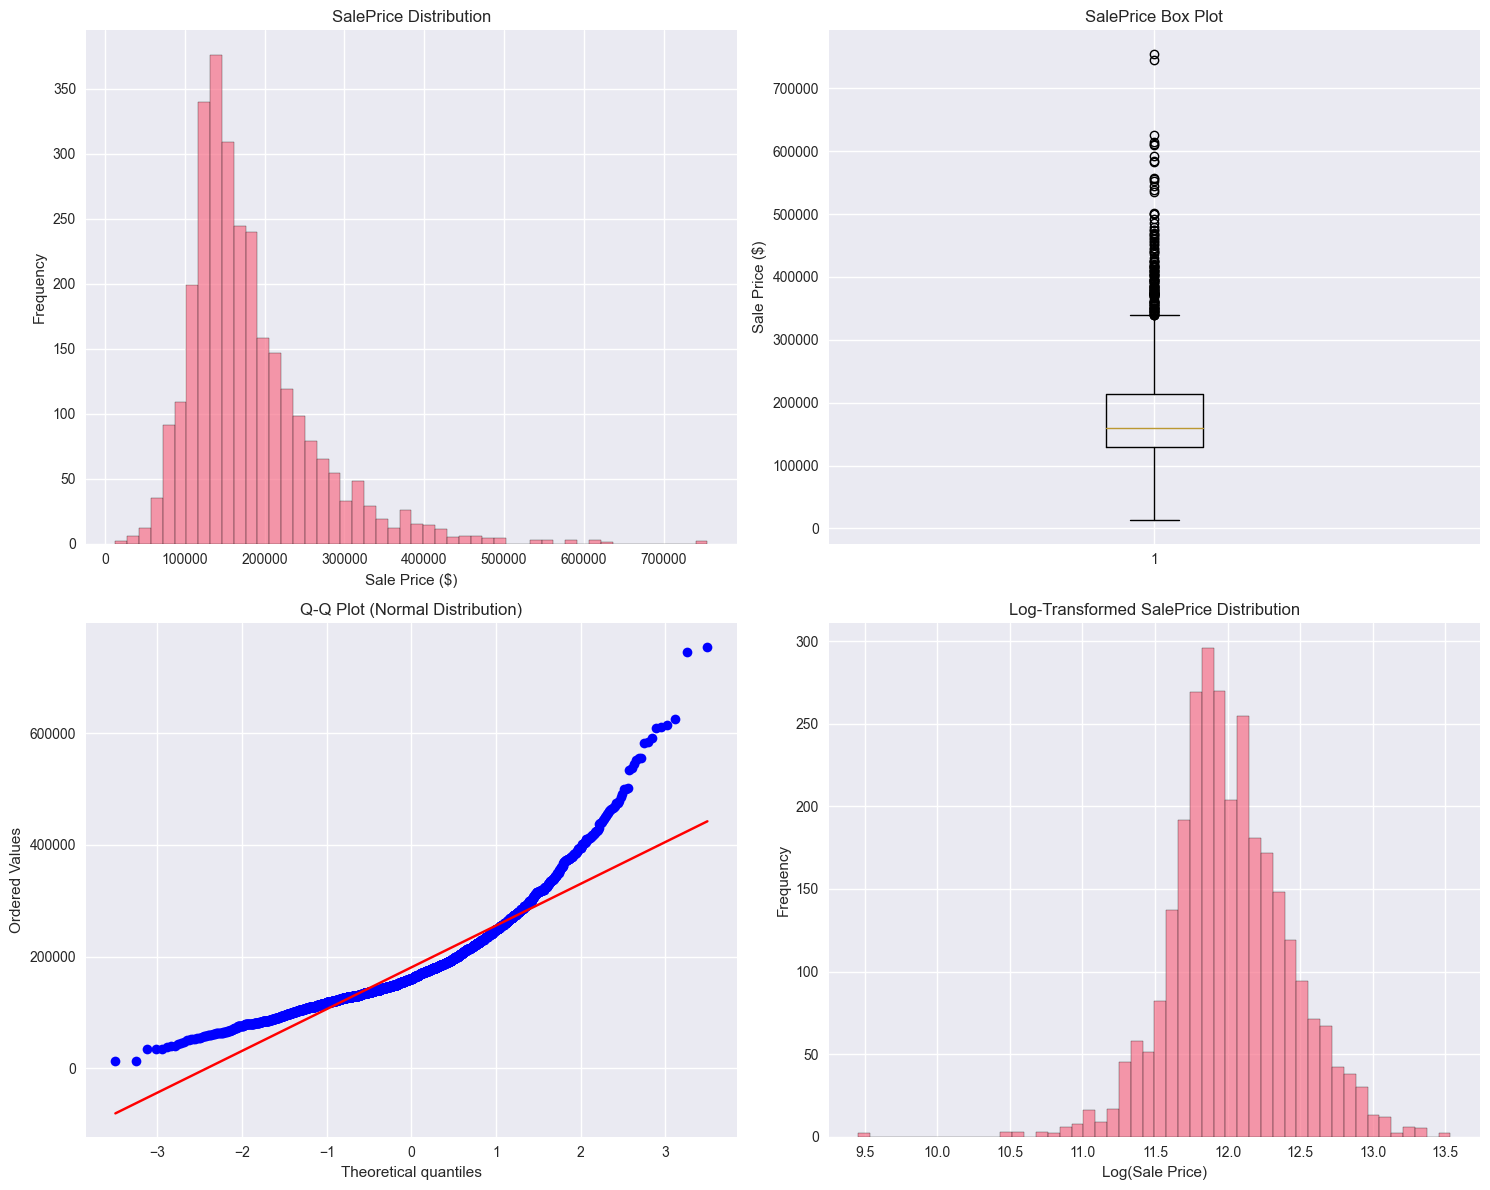

Log-transformed SalePrice skewness: -0.0148


In [12]:
# SalePrice distribution visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histogram
axes[0,0].hist(df['SalePrice'], bins=50, edgecolor='black', alpha=0.7)
axes[0,0].set_title('SalePrice Distribution')
axes[0,0].set_xlabel('Sale Price ($)')
axes[0,0].set_ylabel('Frequency')

# Box plot
axes[0,1].boxplot(df['SalePrice'])
axes[0,1].set_title('SalePrice Box Plot')
axes[0,1].set_ylabel('Sale Price ($)')

# Q-Q plot
stats.probplot(df['SalePrice'], dist="norm", plot=axes[1,0])
axes[1,0].set_title('Q-Q Plot (Normal Distribution)')

# Log-transformed distribution
log_saleprice = np.log(df['SalePrice'])
axes[1,1].hist(log_saleprice, bins=50, edgecolor='black', alpha=0.7)
axes[1,1].set_title('Log-Transformed SalePrice Distribution')
axes[1,1].set_xlabel('Log(Sale Price)')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"Log-transformed SalePrice skewness: {log_saleprice.skew():.4f}")

## 4. Missing Values Analysis

In [13]:
# Calculate missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

print("=== MISSING VALUES SUMMARY ===")
print(f"Total columns with missing values: {len(missing_data)}")
print(f"Total missing values: {missing_data['Missing_Count'].sum():,}")
print(f"Percentage of total data missing: {(missing_data['Missing_Count'].sum() / df.size) * 100:.2f}%")

print("\n=== TOP 20 COLUMNS WITH MISSING VALUES ===")
print(missing_data.head(20))

=== MISSING VALUES SUMMARY ===
Total columns with missing values: 27
Total missing values: 15,749
Percentage of total data missing: 6.55%

=== TOP 20 COLUMNS WITH MISSING VALUES ===
                        Column  Missing_Count  Missing_Percentage
Pool QC                Pool QC           2917           99.556314
Misc Feature      Misc Feature           2824           96.382253
Alley                    Alley           2732           93.242321
Fence                    Fence           2358           80.477816
Mas Vnr Type      Mas Vnr Type           1775           60.580205
Fireplace Qu      Fireplace Qu           1422           48.532423
Lot Frontage      Lot Frontage            490           16.723549
Garage Cond        Garage Cond            159            5.426621
Garage Qual        Garage Qual            159            5.426621
Garage Finish    Garage Finish            159            5.426621
Garage Yr Blt    Garage Yr Blt            159            5.426621
Garage Type        Garage 

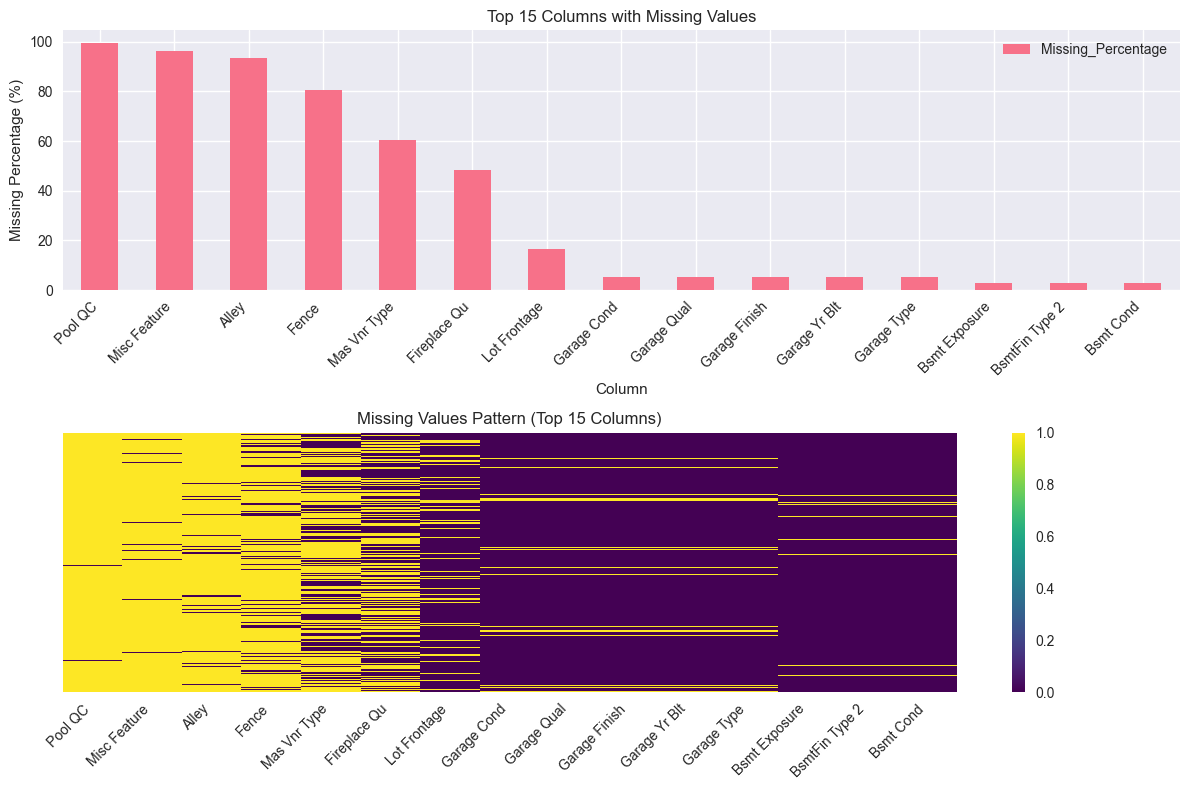

In [14]:
# Visualize missing values
if len(missing_data) > 0:
    plt.figure(figsize=(12, 8))
    
    # Bar plot of missing values
    plt.subplot(2, 1, 1)
    missing_data.head(15).plot(x='Column', y='Missing_Percentage', kind='bar', ax=plt.gca())
    plt.title('Top 15 Columns with Missing Values')
    plt.ylabel('Missing Percentage (%)')
    plt.xticks(rotation=45, ha='right')
    
    # Heatmap of missing values pattern
    plt.subplot(2, 1, 2)
    cols_with_missing = missing_data.head(15)['Column'].tolist()
    sns.heatmap(df[cols_with_missing].isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title('Missing Values Pattern (Top 15 Columns)')
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset!")

## 5. Numerical Variables Analysis

In [16]:
# Descriptive statistics for numerical variables
print("=== NUMERICAL VARIABLES DESCRIPTIVE STATISTICS ===")
numerical_stats = df[[col for col in numerical_cols if col != 'PID']].describe()
print(numerical_stats)

=== NUMERICAL VARIABLES DESCRIPTIVE STATISTICS ===
            Order  MS SubClass  Lot Frontage       Lot Area  Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF   1st Flr SF   2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath    Full Bath    Half Bath  Bedroom AbvGr  Kitchen AbvGr  TotRms AbvGrd   Fireplaces  Garage Yr Blt  Garage Cars  Garage Area  Wood Deck SF  Open Porch SF  Enclosed Porch   3Ssn Porch  Screen Porch    Pool Area      Misc Val      Mo Sold      Yr Sold      SalePrice
count  2930.00000  2930.000000   2440.000000    2930.000000   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   2929.000000   2929.000000  2929.000000    2929.000000  2930.000000  2930.000000      2930.000000  2930.000000     2928.000000     2928.000000  2930.000000  2930.000000    2930.000000    2930.000000    2930.000000  2930.000000    2771.000000  2929.000000  2929.000000   2930.00

In [17]:
# Distribution analysis for numerical variables
print("=== SKEWNESS AND KURTOSIS ANALYSIS ===")
skew_kurt_df = pd.DataFrame({
    'Variable': numerical_cols,
    'Skewness': [df[col].skew() for col in numerical_cols],
    'Kurtosis': [df[col].kurtosis() for col in numerical_cols]
})

# Sort by absolute skewness
skew_kurt_df['Abs_Skewness'] = abs(skew_kurt_df['Skewness'])
skew_kurt_df = skew_kurt_df.sort_values('Abs_Skewness', ascending=False)

print("Top 15 most skewed variables:")
print(skew_kurt_df.head(15)[['Variable', 'Skewness', 'Kurtosis']])

=== SKEWNESS AND KURTOSIS ANALYSIS ===
Top 15 most skewed variables:
           Variable   Skewness    Kurtosis
35         Misc Val  21.999788  566.203298
34        Pool Area  16.939142  299.774944
4          Lot Area  12.820898  265.023671
16  Low Qual Fin SF  12.118162  175.606950
32       3Ssn Porch  11.403795  149.988701
23    Kitchen AbvGr   4.313825   19.869743
11     BsmtFin SF 2   4.139978   18.781481
31   Enclosed Porch   4.014446   28.487205
33     Screen Porch   3.957467   17.859150
19   Bsmt Half Bath   3.940795   14.921740
9      Mas Vnr Area   2.606985    9.286634
30    Open Porch SF   2.535386   10.954343
29     Wood Deck SF   1.842678    6.753955
38        SalePrice   1.743500    5.118900
3      Lot Frontage   1.499067   11.234851


In [19]:
# Correlation matrix for numerical variables
print("=== CORRELATION ANALYSIS ===")
correlation_matrix = df[numerical_cols].corr()

# Find highly correlated pairs
def find_high_correlations(corr_matrix, threshold=0.7):
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                high_corr_pairs.append((
                    corr_matrix.columns[i],
                    corr_matrix.columns[j],
                    corr_matrix.iloc[i, j]
                ))
    return sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)

high_corr = find_high_correlations(correlation_matrix, 0.7)
print(f"\nHighly correlated pairs (|r| >= 0.7): {len(high_corr)}")
for pair in high_corr[:10]:
    print(f"{pair[0]} <-> {pair[1]}: {pair[2]:.3f}")

=== CORRELATION ANALYSIS ===

Highly correlated pairs (|r| >= 0.7): 7
Order <-> Yr Sold: -0.976
Garage Cars <-> Garage Area: 0.890
Year Built <-> Garage Yr Blt: 0.835
Gr Liv Area <-> TotRms AbvGrd: 0.808
Total Bsmt SF <-> 1st Flr SF: 0.801
Overall Qual <-> SalePrice: 0.799
Gr Liv Area <-> SalePrice: 0.707


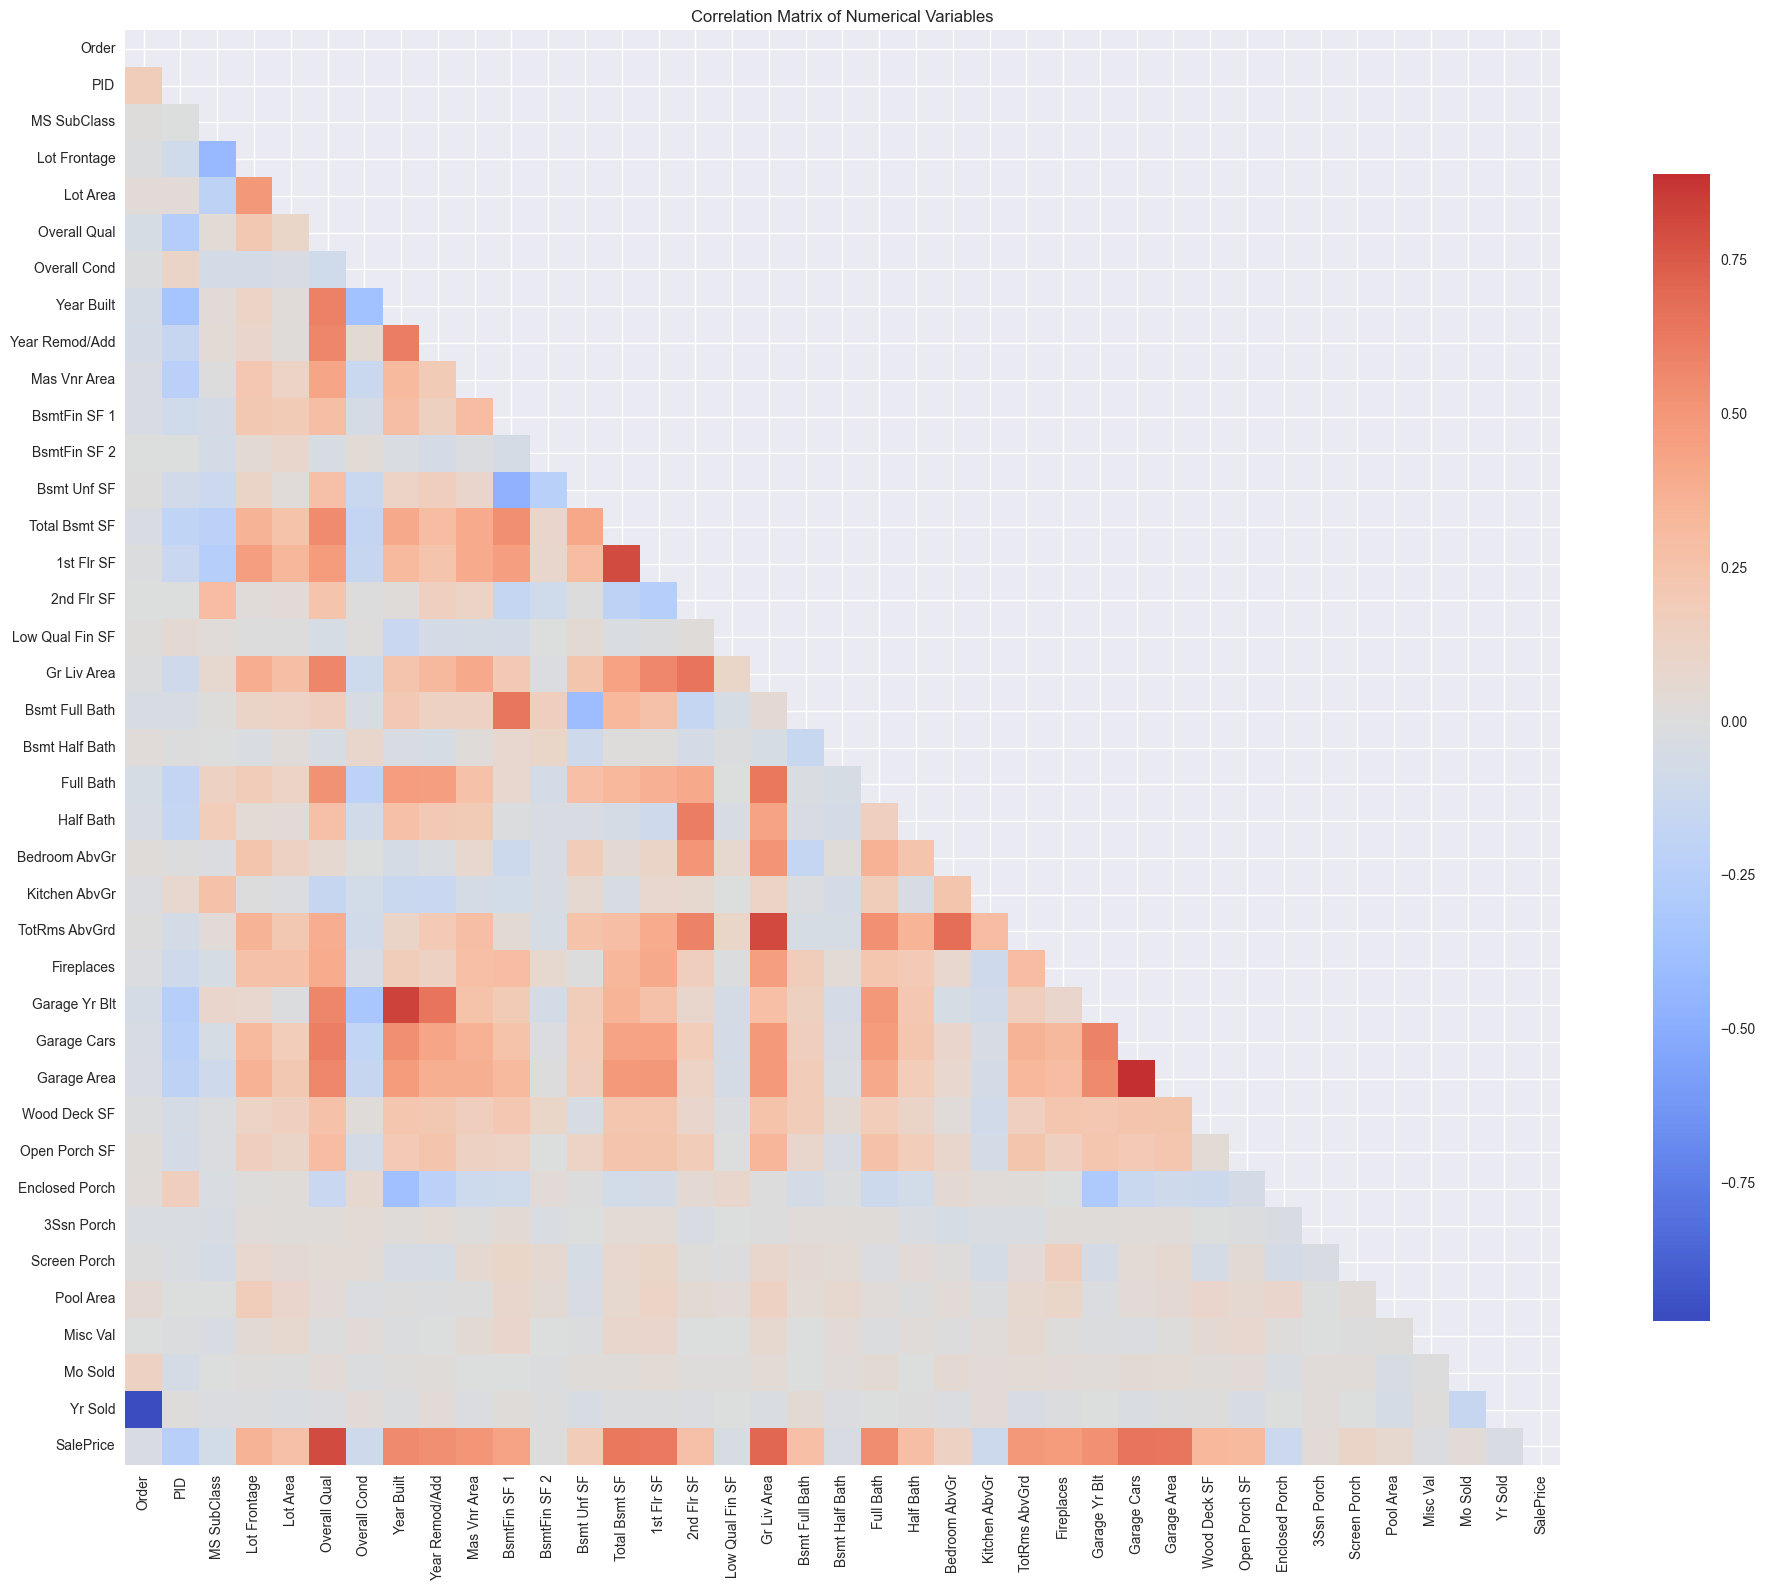

In [20]:
# Visualize correlation matrix
plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

=== TOP 15 CORRELATIONS WITH SALEPRICE ===
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Garage Yr Blt     0.526965
Mas Vnr Area      0.508285
TotRms AbvGrd     0.495474
Fireplaces        0.474558
BsmtFin SF 1      0.432914
Lot Frontage      0.357318
Name: SalePrice, dtype: float64


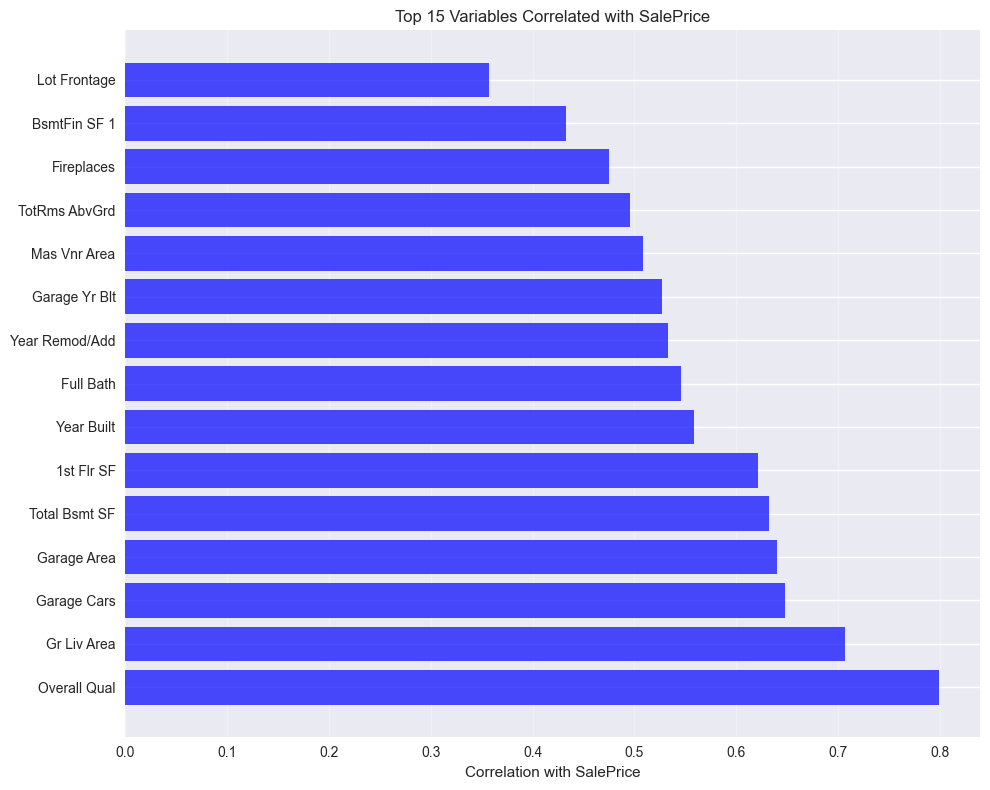

In [21]:
# Top correlations with SalePrice
saleprice_corr = correlation_matrix['SalePrice'].drop('SalePrice').sort_values(key=abs, ascending=False)

print("=== TOP 15 CORRELATIONS WITH SALEPRICE ===")
print(saleprice_corr.head(15))

# Visualize top correlations with SalePrice
plt.figure(figsize=(10, 8))
top_corr = saleprice_corr.head(15)
colors = ['red' if x < 0 else 'blue' for x in top_corr.values]
plt.barh(range(len(top_corr)), top_corr.values, color=colors, alpha=0.7)
plt.yticks(range(len(top_corr)), top_corr.index)
plt.xlabel('Correlation with SalePrice')
plt.title('Top 15 Variables Correlated with SalePrice')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

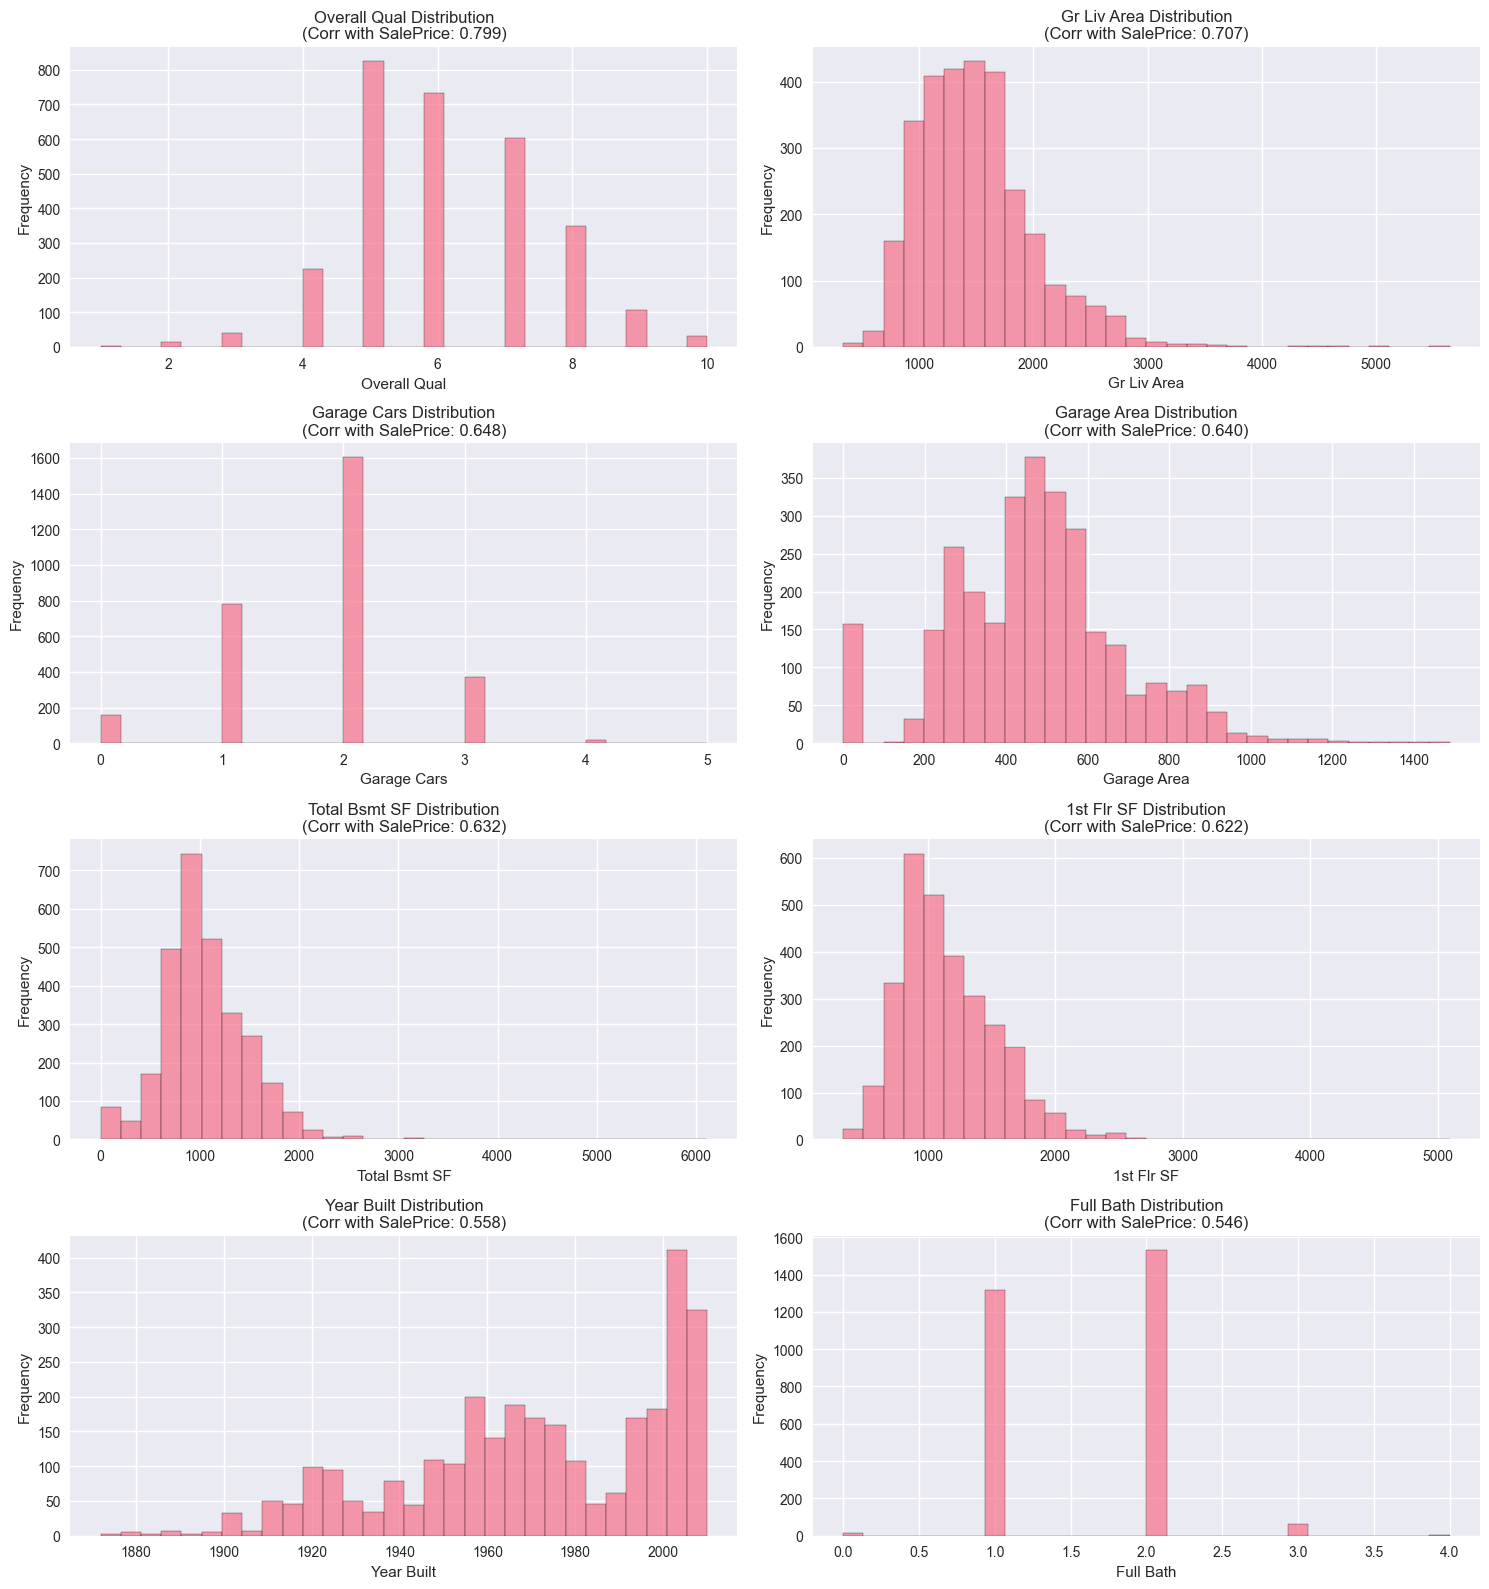

In [22]:
# Distribution plots for top correlated numerical variables
top_numerical_vars = saleprice_corr.head(8).index.tolist()

fig, axes = plt.subplots(4, 2, figsize=(15, 16))
axes = axes.ravel()

for i, var in enumerate(top_numerical_vars):
    axes[i].hist(df[var].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'{var} Distribution\n(Corr with SalePrice: {saleprice_corr[var]:.3f})')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 6. Categorical Variables Analysis

In [23]:
# Categorical variables overview
print("=== CATEGORICAL VARIABLES OVERVIEW ===")
cat_summary = pd.DataFrame({
    'Variable': categorical_cols,
    'Unique_Values': [df[col].nunique() for col in categorical_cols],
    'Most_Frequent': [df[col].mode()[0] if not df[col].empty else 'N/A' for col in categorical_cols],
    'Most_Frequent_Count': [df[col].value_counts().iloc[0] if not df[col].empty else 0 for col in categorical_cols],
    'Missing_Count': [df[col].isnull().sum() for col in categorical_cols]
})

cat_summary['Most_Frequent_Percentage'] = (cat_summary['Most_Frequent_Count'] / len(df)) * 100
cat_summary = cat_summary.sort_values('Unique_Values', ascending=False)

print(cat_summary)

=== CATEGORICAL VARIABLES OVERVIEW ===
          Variable  Unique_Values Most_Frequent  Most_Frequent_Count  Missing_Count  Most_Frequent_Percentage
8     Neighborhood             28         NAmes                  443              0                 15.119454
16    Exterior 2nd             17       VinylSd                 1015              0                 34.641638
15    Exterior 1st             16       VinylSd                 1026              0                 35.017065
41       Sale Type             10           WD                  2536              0                 86.552901
9      Condition 1              9          Norm                 2522              0                 86.075085
31      Functional              8           Typ                 2728              0                 93.105802
10     Condition 2              8          Norm                 2900              0                 98.976109
12     House Style              8        1Story                 1481             

In [24]:
# Analyze categorical variables with low cardinality
low_cardinality_vars = cat_summary[cat_summary['Unique_Values'] <= 10]['Variable'].tolist()

print(f"=== LOW CARDINALITY CATEGORICAL VARIABLES ({len(low_cardinality_vars)}) ===")
for var in low_cardinality_vars[:10]:  # Show first 10
    print(f"\n{var}:")
    value_counts = df[var].value_counts()
    print(value_counts)

=== LOW CARDINALITY CATEGORICAL VARIABLES (40) ===

Sale Type:
Sale Type
WD       2536
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
VWD         1
Name: count, dtype: int64

Condition 1:
Condition 1
Norm      2522
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: count, dtype: int64

Functional:
Functional
Typ     2728
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Sal        2
Name: count, dtype: int64

Condition 2:
Condition 2
Norm      2900
Feedr       13
Artery       5
PosA         4
PosN         4
RRNn         2
RRAe         1
RRAn         1
Name: count, dtype: int64

House Style:
House Style
1Story    1481
2Story     873
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: count, dtype: int64

Roof Matl:
Roof Matl
CompShg    2887
Tar&Grv      23
WdShake       9
WdShng

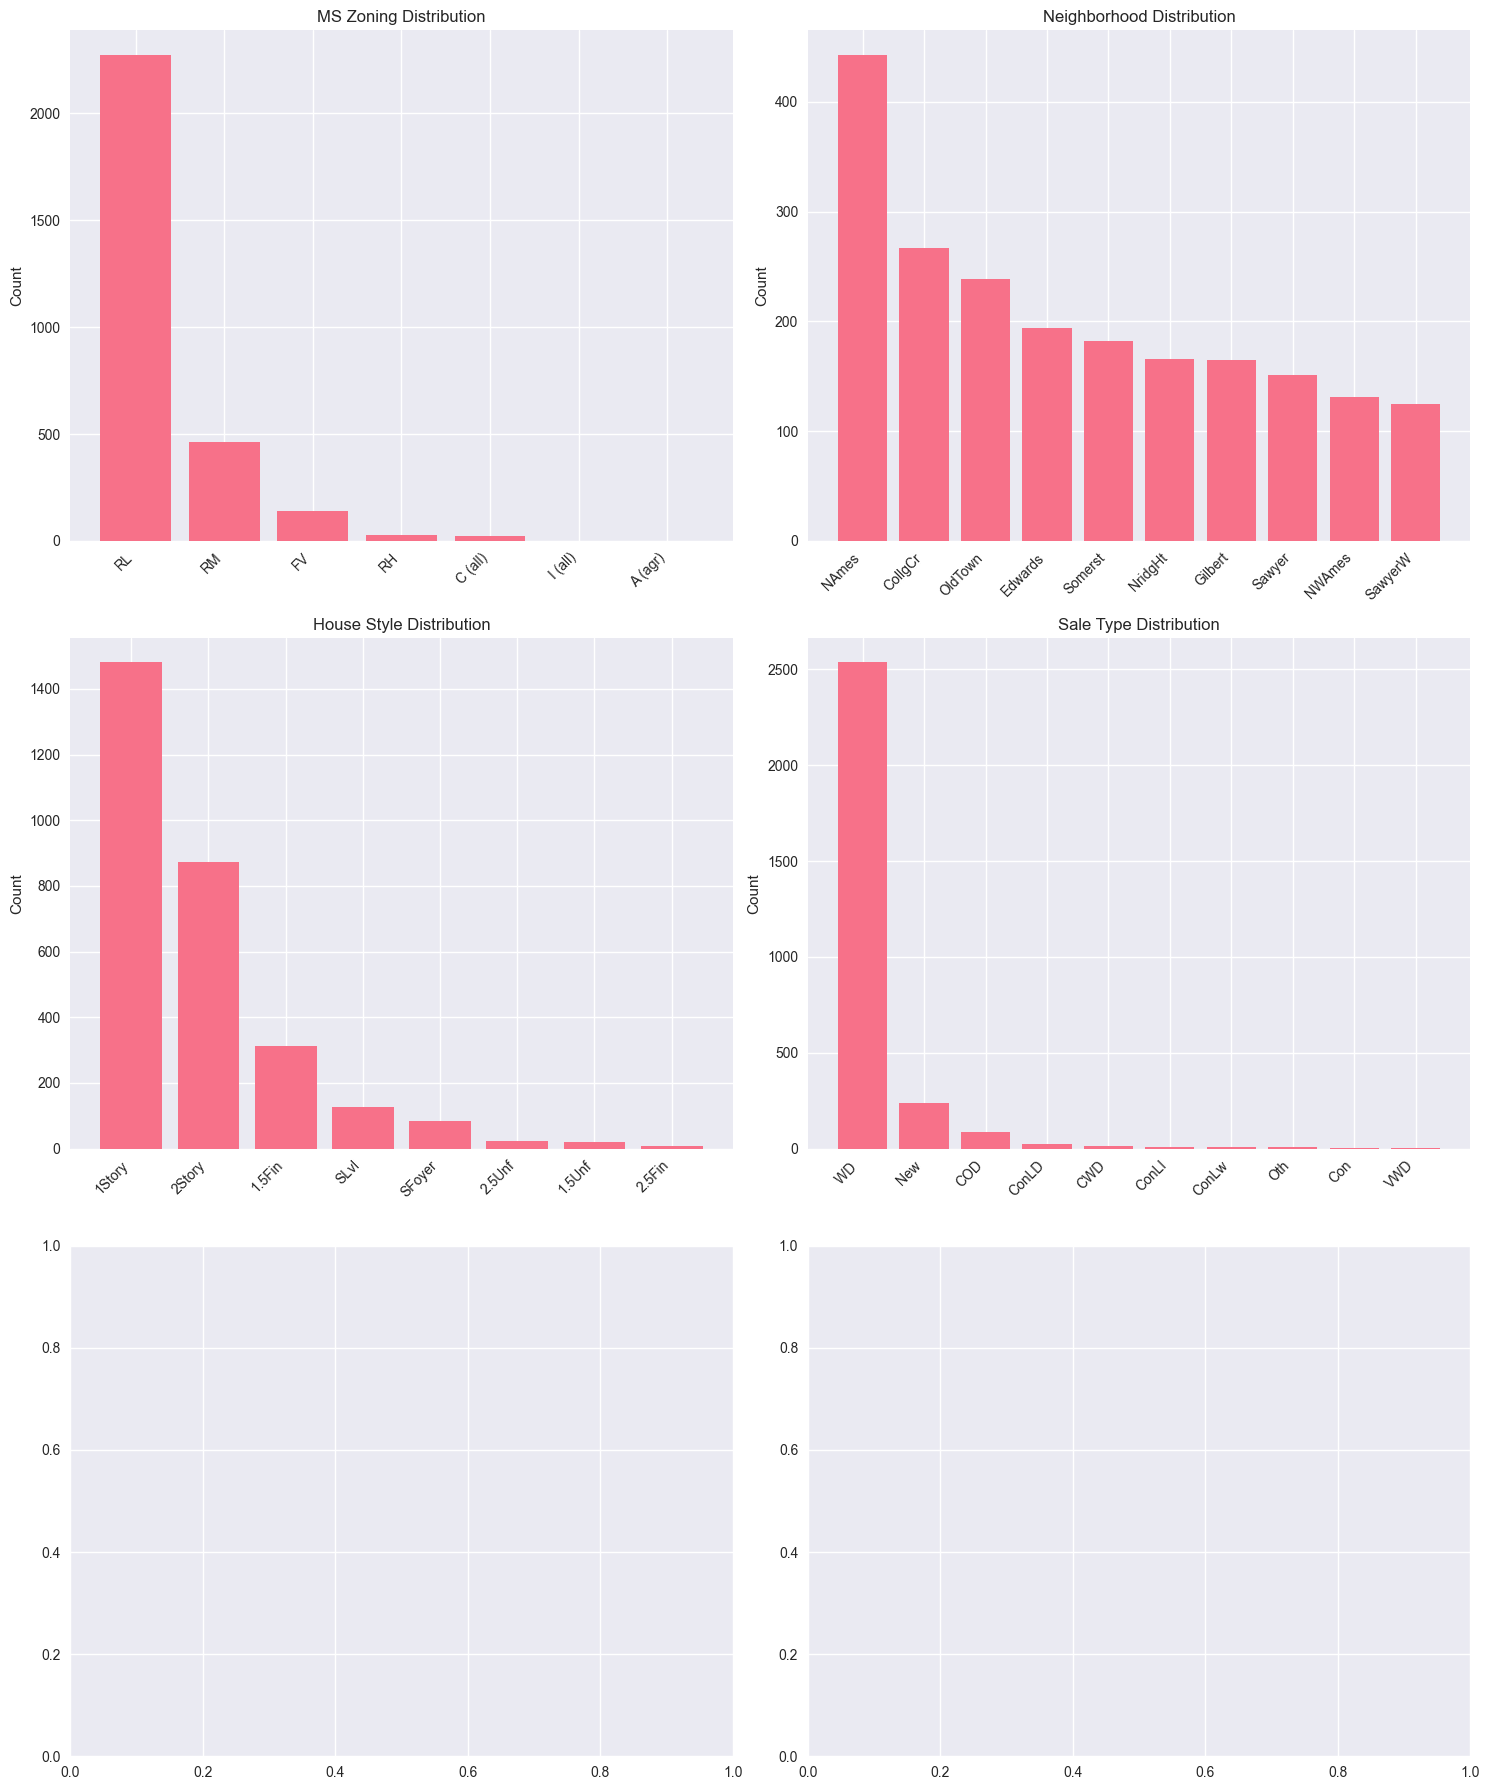

In [25]:
# Visualize some key categorical variables
key_categorical = ['MS Zoning', 'Neighborhood', 'House Style', 'Overall Qual', 'Overall Cond', 'Sale Type']
key_categorical = [col for col in key_categorical if col in categorical_cols]

fig, axes = plt.subplots(3, 2, figsize=(15, 18))
axes = axes.ravel()

for i, var in enumerate(key_categorical):
    if i < len(axes):
        value_counts = df[var].value_counts().head(10)
        axes[i].bar(range(len(value_counts)), value_counts.values)
        axes[i].set_title(f'{var} Distribution')
        axes[i].set_ylabel('Count')
        axes[i].set_xticks(range(len(value_counts)))
        axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

## 7. Relationship Analysis: Categorical vs SalePrice

In [26]:
# Analyze relationship between categorical variables and SalePrice
def analyze_categorical_impact(df, cat_var, target='SalePrice'):
    """
    Analyze the impact of a categorical variable on the target variable
    """
    grouped = df.groupby(cat_var)[target].agg(['count', 'mean', 'median', 'std']).round(2)
    grouped = grouped.sort_values('mean', ascending=False)
    return grouped

# Analyze key categorical variables
print("=== CATEGORICAL VARIABLES IMPACT ON SALEPRICE ===")
for var in key_categorical[:3]:  # Show first 3
    print(f"\n{var}:")
    impact = analyze_categorical_impact(df, var)
    print(impact.head(10))

=== CATEGORICAL VARIABLES IMPACT ON SALEPRICE ===

MS Zoning:
           count       mean    median       std
MS Zoning                                      
FV           139  218986.95  209000.0  52684.23
RL          2273  191283.25  172000.0  81295.74
RH            27  136419.78  140000.0  36173.10
RM           462  126781.39  120750.0  48145.54
I (all)        2   80312.50   80312.5  32084.97
C (all)       25   79795.04   78000.0  31084.82
A (agr)        2   47300.00   47300.0  48366.10

Neighborhood:
              count       mean    median        std
Neighborhood                                       
NoRidge          71  330319.13  302000.0  101444.66
StoneBr          51  324229.20  319000.0  119273.02
NridgHt         166  322018.27  317750.0   95932.35
GrnHill           2  280000.00  280000.0   70710.68
Veenker          24  248314.58  250250.0   65474.95
Timber           72  246599.54  232106.5   69326.47
Somerst         182  229707.32  225500.0   57437.39
ClearCr          44  20

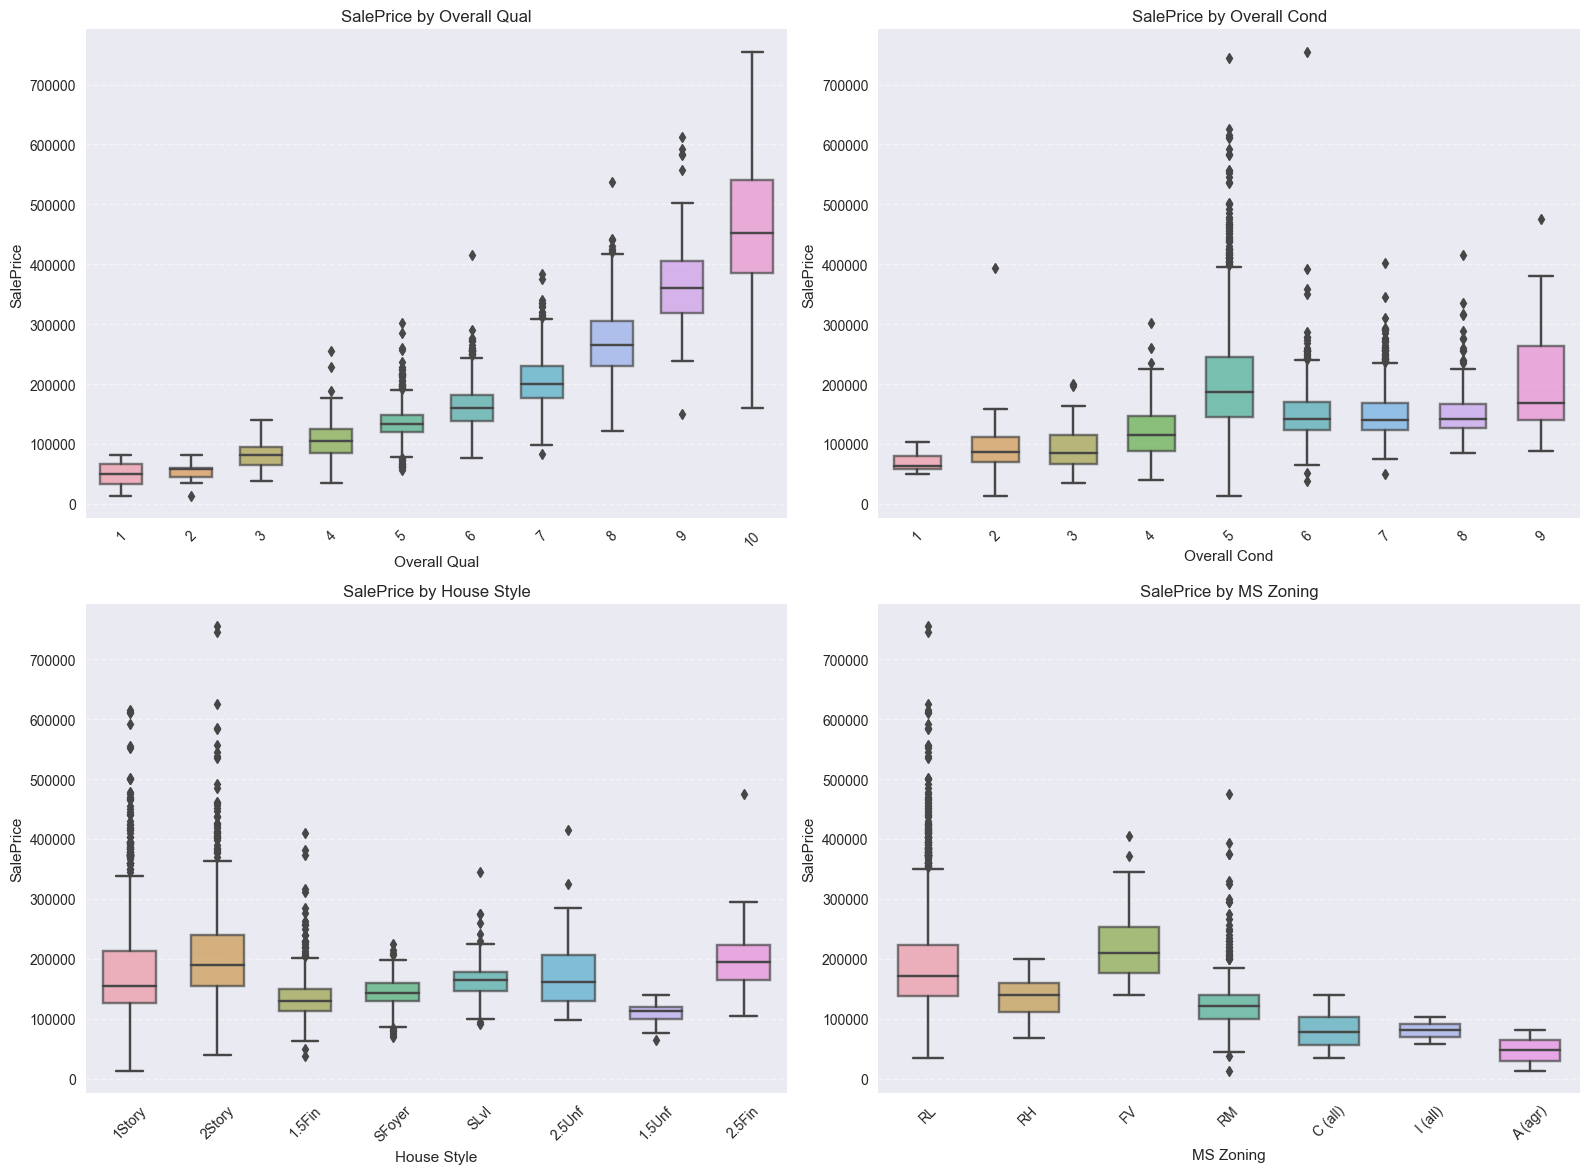

In [32]:
# Box plots for categorical variables vs SalePrice
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

import seaborn as sns

categorical_for_boxplot = ['Overall Qual', 'Overall Cond', 'House Style', 'MS Zoning']
categorical_for_boxplot = [col for col in categorical_for_boxplot if col in df.columns]

for i, var in enumerate(categorical_for_boxplot):
    if i < len(axes):
        sns.boxplot(x=var, y='SalePrice', data=df, ax=axes[i], showfliers=True, width=0.6, boxprops=dict(alpha=0.7))
        axes[i].set_title(f'SalePrice by {var}')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('SalePrice')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(True, axis='y', linestyle='--', alpha=0.5)

plt.suptitle('')
plt.tight_layout()
plt.show()

## 8. Outlier Detection and Analysis

In [33]:
# Outlier detection using IQR method
def detect_outliers_iqr(df, column):
    """
    Detect outliers using the IQR method
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers in SalePrice
outliers_price, lower_price, upper_price = detect_outliers_iqr(df, 'SalePrice')

print("=== SALEPRICE OUTLIERS ANALYSIS ===")
print(f"Lower bound: ${lower_price:,.0f}")
print(f"Upper bound: ${upper_price:,.0f}")
print(f"Number of outliers: {len(outliers_price)} ({len(outliers_price)/len(df)*100:.2f}%)")
print(f"Outlier price range: ${outliers_price['SalePrice'].min():,.0f} - ${outliers_price['SalePrice'].max():,.0f}")

=== SALEPRICE OUTLIERS ANALYSIS ===
Lower bound: $3,500
Upper bound: $339,500
Number of outliers: 137 (4.68%)
Outlier price range: $339,750 - $755,000


In [34]:
# Outlier analysis for top correlated numerical variables
outlier_summary = []
top_vars_for_outliers = saleprice_corr.head(5).index.tolist()

for var in top_vars_for_outliers:
    outliers, lower, upper = detect_outliers_iqr(df, var)
    outlier_summary.append({
        'Variable': var,
        'Outlier_Count': len(outliers),
        'Outlier_Percentage': len(outliers)/len(df)*100,
        'Lower_Bound': lower,
        'Upper_Bound': upper
    })

outlier_df = pd.DataFrame(outlier_summary)
print("\n=== OUTLIERS IN TOP CORRELATED VARIABLES ===")
print(outlier_df)


=== OUTLIERS IN TOP CORRELATED VARIABLES ===
        Variable  Outlier_Count  Outlier_Percentage  Lower_Bound  Upper_Bound
0   Overall Qual              4            0.136519        2.000       10.000
1    Gr Liv Area             75            2.559727      200.875     2667.875
2    Garage Cars             17            0.580205       -0.500        3.500
3    Garage Area             42            1.433447      -64.000      960.000
4  Total Bsmt SF            123            4.197952       29.500     2065.500


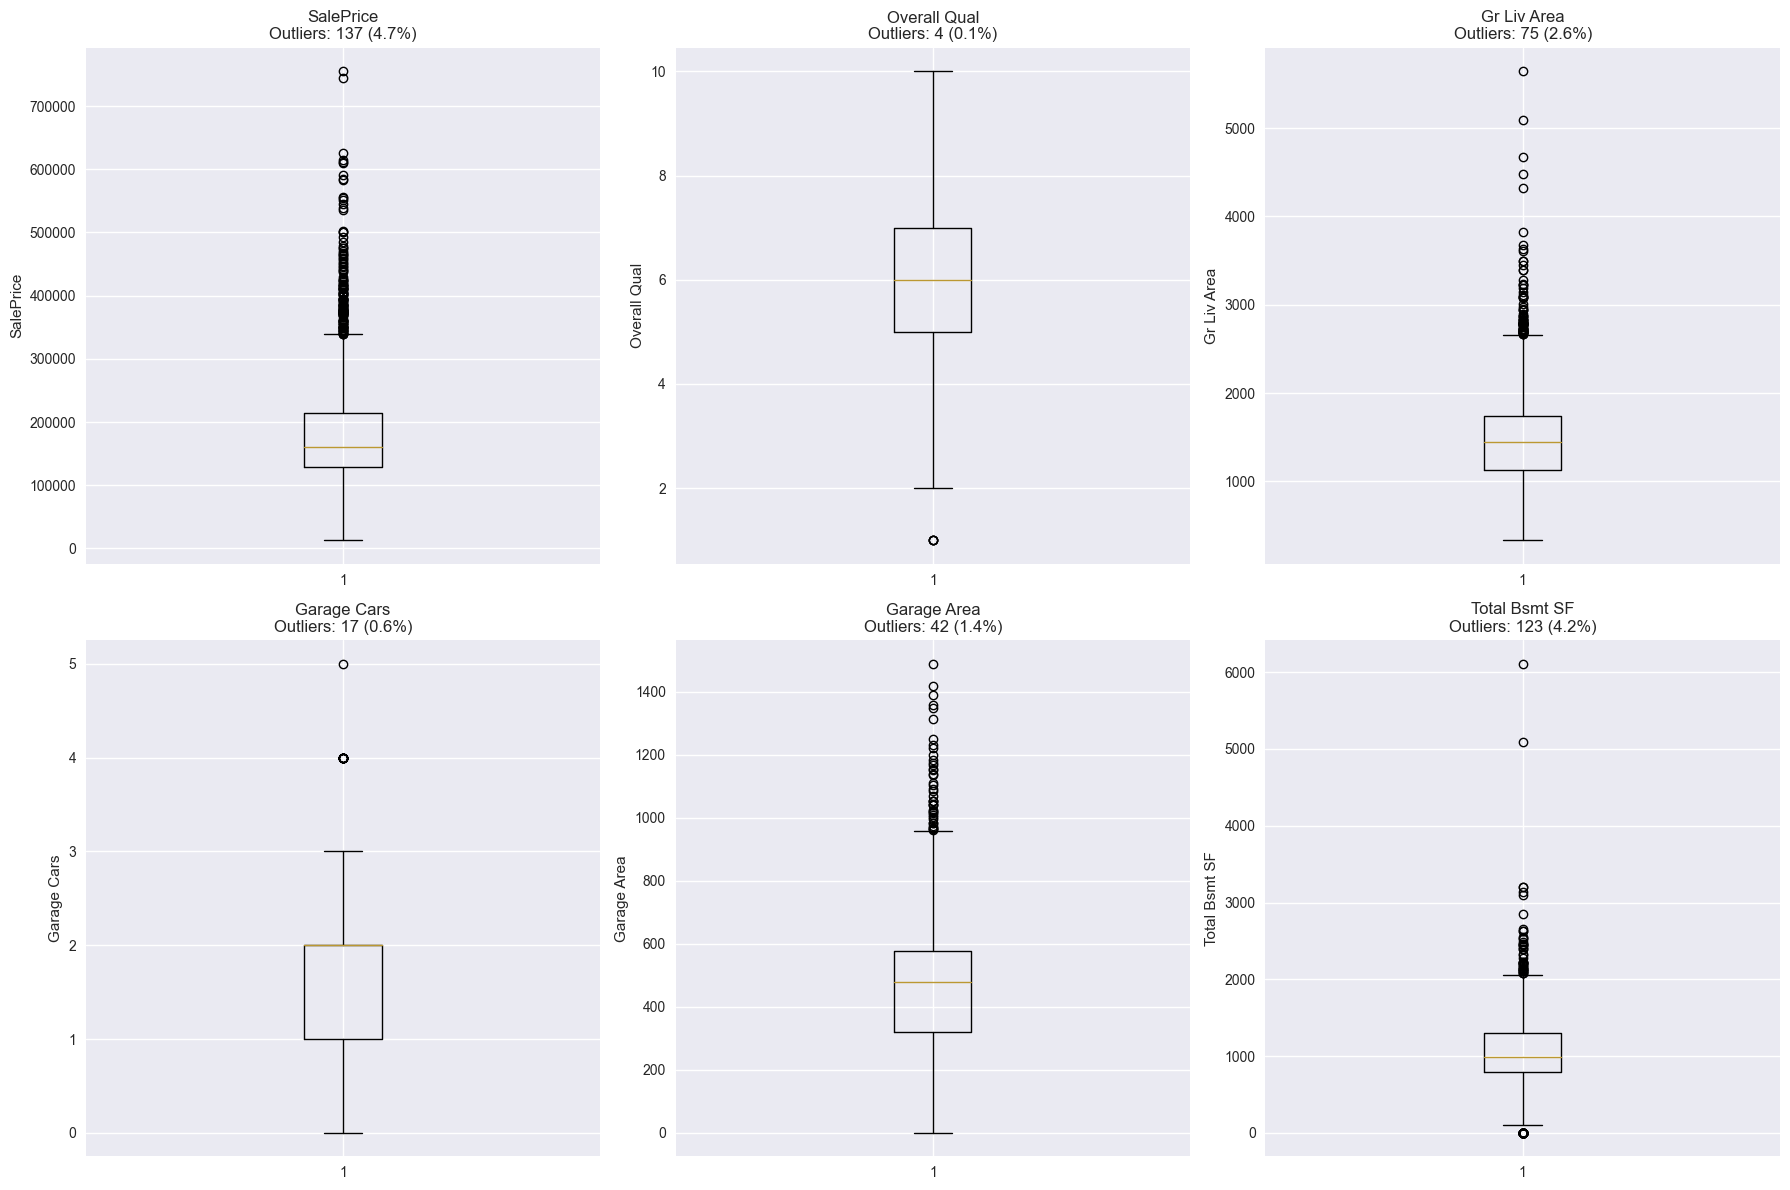

In [35]:
# Visualize outliers
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

vars_to_plot = ['SalePrice'] + top_vars_for_outliers[:5]

for i, var in enumerate(vars_to_plot):
    if i < len(axes):
        axes[i].boxplot(df[var].dropna())
        axes[i].set_title(f'{var} - Outlier Detection')
        axes[i].set_ylabel(var)
        
        # Add outlier count to title
        outliers, _, _ = detect_outliers_iqr(df, var)
        axes[i].set_title(f'{var}\nOutliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)')

plt.tight_layout()
plt.show()

## 9. Feature Engineering Insights

In [36]:
# Create some engineered features for analysis
df_temp = df.copy()

# Total square footage
if all(col in df.columns for col in ['Gr Liv Area', 'Total Bsmt SF']):
    df_temp['Total_SF'] = df_temp['Gr Liv Area'] + df_temp['Total Bsmt SF'].fillna(0)

# House age
if all(col in df.columns for col in ['Yr Sold', 'Year Built']):
    df_temp['House_Age'] = df_temp['Yr Sold'] - df_temp['Year Built']

# Remodel flag
if all(col in df.columns for col in ['Year Remod/Add', 'Year Built']):
    df_temp['Is_Remodeled'] = (df_temp['Year Remod/Add'] != df_temp['Year Built']).astype(int)

# Total bathrooms
bathroom_cols = ['Full Bath', 'Half Bath', 'Bsmt Full Bath', 'Bsmt Half Bath']
available_bathroom_cols = [col for col in bathroom_cols if col in df.columns]
if available_bathroom_cols:
    df_temp['Total_Bathrooms'] = df_temp[available_bathroom_cols].fillna(0).sum(axis=1)

print("=== ENGINEERED FEATURES ANALYSIS ===")
engineered_features = ['Total_SF', 'House_Age', 'Is_Remodeled', 'Total_Bathrooms']
available_engineered = [col for col in engineered_features if col in df_temp.columns]

for feature in available_engineered:
    corr_with_price = df_temp[feature].corr(df_temp['SalePrice'])
    print(f"{feature}: correlation with SalePrice = {corr_with_price:.4f}")
    print(f"  Descriptive stats: {df_temp[feature].describe()}\n")

=== ENGINEERED FEATURES ANALYSIS ===
Total_SF: correlation with SalePrice = 0.7901
  Descriptive stats: count     2930.000000
mean      2550.946075
std        805.253248
min        334.000000
25%       2004.000000
50%       2452.000000
75%       2994.500000
max      11752.000000
Name: Total_SF, dtype: float64

House_Age: correlation with SalePrice = -0.5589
  Descriptive stats: count    2930.000000
mean       36.434130
std        30.291357
min        -1.000000
25%         7.000000
50%        34.000000
75%        54.000000
max       136.000000
Name: House_Age, dtype: float64

Is_Remodeled: correlation with SalePrice = -0.0473
  Descriptive stats: count    2930.000000
mean        0.464505
std         0.498824
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Is_Remodeled, dtype: float64

Total_Bathrooms: correlation with SalePrice = 0.6174
  Descriptive stats: count    2930.000000
mean        2.438225
std         0.940954
min  

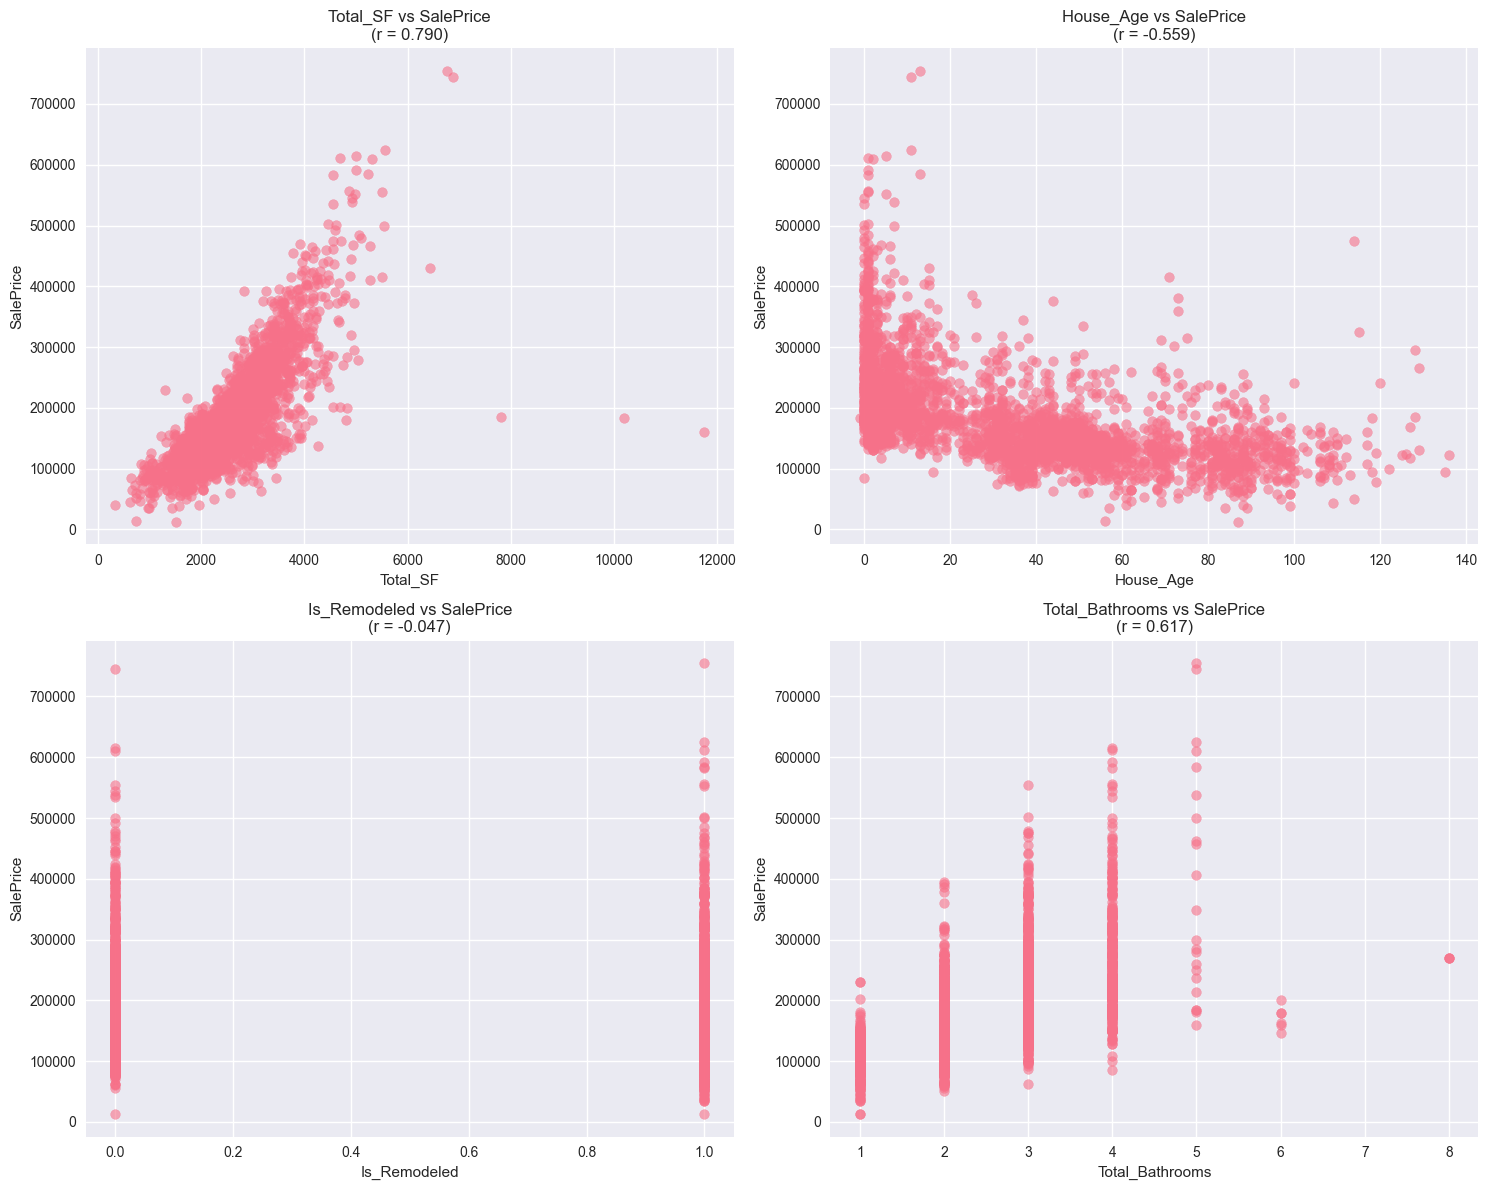

In [37]:
# Visualize engineered features
if available_engineered:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.ravel()
    
    for i, feature in enumerate(available_engineered[:4]):
        if i < len(axes):
            axes[i].scatter(df_temp[feature], df_temp['SalePrice'], alpha=0.6)
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('SalePrice')
            axes[i].set_title(f'{feature} vs SalePrice')
            
            # Add correlation to title
            corr = df_temp[feature].corr(df_temp['SalePrice'])
            axes[i].set_title(f'{feature} vs SalePrice\n(r = {corr:.3f})')
    
    plt.tight_layout()
    plt.show()

## 10. Geographic and Temporal Analysis

In [38]:
# Neighborhood analysis
if 'Neighborhood' in df.columns:
    neighborhood_stats = df.groupby('Neighborhood')['SalePrice'].agg([
        'count', 'mean', 'median', 'std'
    ]).round(0)
    neighborhood_stats = neighborhood_stats.sort_values('mean', ascending=False)
    
    print("=== NEIGHBORHOOD ANALYSIS ===")
    print(f"Number of neighborhoods: {df['Neighborhood'].nunique()}")
    print("\nTop 10 neighborhoods by average price:")
    print(neighborhood_stats.head(10))
    
    print("\nBottom 5 neighborhoods by average price:")
    print(neighborhood_stats.tail(5))

=== NEIGHBORHOOD ANALYSIS ===
Number of neighborhoods: 28

Top 10 neighborhoods by average price:
              count      mean    median       std
Neighborhood                                     
NoRidge          71  330319.0  302000.0  101445.0
StoneBr          51  324229.0  319000.0  119273.0
NridgHt         166  322018.0  317750.0   95932.0
GrnHill           2  280000.0  280000.0   70711.0
Veenker          24  248315.0  250250.0   65475.0
Timber           72  246600.0  232106.0   69326.0
Somerst         182  229707.0  225500.0   57437.0
ClearCr          44  208662.0  197500.0   51280.0
Crawfor         103  207551.0  200624.0   65230.0
CollgCr         267  201803.0  200000.0   54188.0

Bottom 5 neighborhoods by average price:
              count      mean    median      std
Neighborhood                                    
BrkSide         108  124756.0  126750.0  35741.0
OldTown         239  123992.0  119900.0  44327.0
BrDale           30  105608.0  106000.0  12145.0
IDOTRR         

In [40]:
# Temporal analysis
temporal_cols = ['Mo Sold', 'Yr Sold']
available_temporal = [col for col in temporal_cols if col in df.columns]

if available_temporal:
    print("=== TEMPORAL ANALYSIS ===")
    
    if 'Yr Sold' in df.columns:
        yearly_stats = df.groupby('Yr Sold')['SalePrice'].agg(['count', 'mean', 'median']).round(0)
        print("\nSales by Year:")
        print(yearly_stats)
    
    if 'Mo Sold' in df.columns:
        monthly_stats = df.groupby('Mo Sold')['SalePrice'].agg(['count', 'mean', 'median']).round(0)
        print("\nSales by Month:")
        print(monthly_stats)

=== TEMPORAL ANALYSIS ===

Sales by Year:
         count      mean    median
Yr Sold                           
2006       625  181762.0  159500.0
2007       694  185138.0  165125.0
2008       622  178842.0  161000.0
2009       648  181405.0  160850.0
2010       341  172598.0  155000.0

Sales by Month:
         count      mean    median
Mo Sold                           
1          123  194210.0  171000.0
2          133  178364.0  165000.0
3          232  176130.0  159948.0
4          279  167712.0  152000.0
5          395  173700.0  158000.0
6          505  181543.0  160000.0
7          449  184367.0  160000.0
8          233  186222.0  165000.0
9          161  191552.0  177000.0
10         173  180057.0  155000.0
11         143  187651.0  173000.0
12         104  184454.0  165500.0


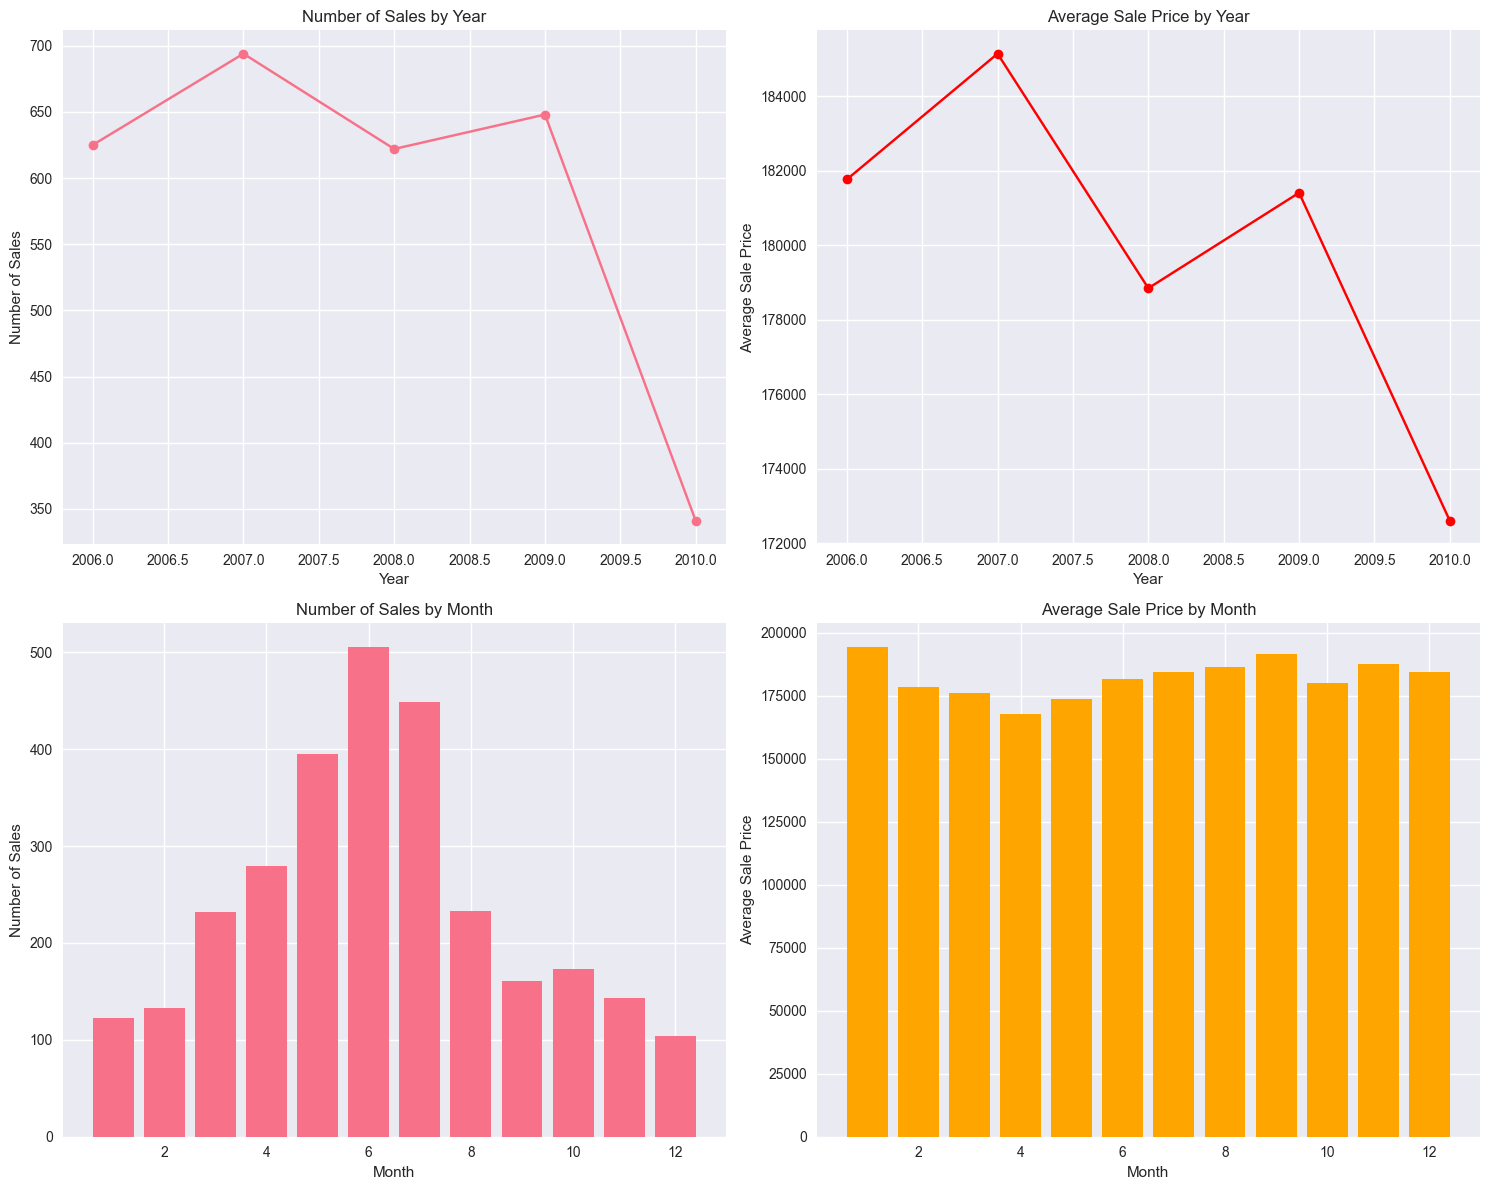

In [41]:
# Visualize temporal patterns
if len(available_temporal) >= 2:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Sales count by year
    yearly_counts = df['Yr Sold'].value_counts().sort_index()
    axes[0,0].plot(yearly_counts.index, yearly_counts.values, marker='o')
    axes[0,0].set_title('Number of Sales by Year')
    axes[0,0].set_xlabel('Year')
    axes[0,0].set_ylabel('Number of Sales')
    
    # Average price by year
    yearly_prices = df.groupby('Yr Sold')['SalePrice'].mean()
    axes[0,1].plot(yearly_prices.index, yearly_prices.values, marker='o', color='red')
    axes[0,1].set_title('Average Sale Price by Year')
    axes[0,1].set_xlabel('Year')
    axes[0,1].set_ylabel('Average Sale Price')
    
    # Sales count by month
    monthly_counts = df['Mo Sold'].value_counts().sort_index()
    axes[1,0].bar(monthly_counts.index, monthly_counts.values)
    axes[1,0].set_title('Number of Sales by Month')
    axes[1,0].set_xlabel('Month')
    axes[1,0].set_ylabel('Number of Sales')
    
    # Average price by month
    monthly_prices = df.groupby('Mo Sold')['SalePrice'].mean()
    axes[1,1].bar(monthly_prices.index, monthly_prices.values, color='orange')
    axes[1,1].set_title('Average Sale Price by Month')
    axes[1,1].set_xlabel('Month')
    axes[1,1].set_ylabel('Average Sale Price')
    
    plt.tight_layout()
    plt.show()

## 11. Data Quality Assessment

In [42]:
# Data quality assessment
print("=== DATA QUALITY ASSESSMENT ===")

# Check for negative values in variables that shouldn't have them
area_columns = [col for col in df.columns if 'Area' in col or 'SF' in col]
price_columns = [col for col in df.columns if 'Price' in col or 'Val' in col]
year_columns = [col for col in df.columns if 'Year' in col or 'Yr' in col]

print("\nChecking for negative values in area/size columns:")
for col in area_columns:
    if df[col].dtype in ['int64', 'float64']:
        negative_count = (df[col] < 0).sum()
        if negative_count > 0:
            print(f"{col}: {negative_count} negative values")

print("\nChecking for unrealistic values:")
# Check for houses built in the future
if 'Year Built' in df.columns:
    future_built = (df['Year Built'] > 2023).sum()
    if future_built > 0:
        print(f"Houses built in the future: {future_built}")

# Check for extremely old houses
if 'Year Built' in df.columns:
    very_old = (df['Year Built'] < 1800).sum()
    if very_old > 0:
        print(f"Houses built before 1800: {very_old}")

# Check for zero lot areas
if 'Lot Area' in df.columns:
    zero_lot = (df['Lot Area'] == 0).sum()
    if zero_lot > 0:
        print(f"Houses with zero lot area: {zero_lot}")

print("\nData consistency checks:")
# Check if remodel year is before built year
if all(col in df.columns for col in ['Year Remod/Add', 'Year Built']):
    inconsistent_remodel = (df['Year Remod/Add'] < df['Year Built']).sum()
    if inconsistent_remodel > 0:
        print(f"Houses remodeled before built: {inconsistent_remodel}")

# Check if garage year is reasonable compared to house year
if all(col in df.columns for col in ['Garage Yr Blt', 'Year Built']):
    garage_before_house = ((df['Garage Yr Blt'] < df['Year Built']) & 
                          df['Garage Yr Blt'].notna()).sum()
    if garage_before_house > 0:
        print(f"Garages built before house: {garage_before_house}")

=== DATA QUALITY ASSESSMENT ===

Checking for negative values in area/size columns:

Checking for unrealistic values:

Data consistency checks:
Houses remodeled before built: 1
Garages built before house: 18


## 12. Summary and Key Insights

In [43]:
print("=== KEY INSIGHTS AND RECOMMENDATIONS ===")
print("\n1. DATASET OVERVIEW:")
print(f"   - {df.shape[0]:,} houses with {df.shape[1]} features")
print(f"   - {len(numerical_cols)} numerical and {len(categorical_cols)} categorical variables")
print(f"   - {len(missing_data)} variables have missing values")

print("\n2. TARGET VARIABLE (SalePrice):")
print(f"   - Range: ${df['SalePrice'].min():,.0f} - ${df['SalePrice'].max():,.0f}")
print(f"   - Mean: ${df['SalePrice'].mean():,.0f}")
print(f"   - Median: ${df['SalePrice'].median():,.0f}")
print(f"   - Skewness: {df['SalePrice'].skew():.3f} (right-skewed)")
print(f"   - {len(outliers_price)} outliers detected ({len(outliers_price)/len(df)*100:.1f}%)")

print("\n3. TOP PREDICTIVE FEATURES:")
top_features = saleprice_corr.head(5)
for i, (feature, corr) in enumerate(top_features.items(), 1):
    print(f"   {i}. {feature}: {corr:.3f}")

print("\n4. MISSING DATA HIGHLIGHTS:")
if len(missing_data) > 0:
    top_missing = missing_data.head(3)
    for _, row in top_missing.iterrows():
        print(f"   - {row['Column']}: {row['Missing_Percentage']:.1f}% missing")
else:
    print("   - No missing values detected")

print("\n5. RECOMMENDATIONS FOR MODELING:")
print("   - Apply log transformation to SalePrice to reduce skewness")
print("   - Handle missing values appropriately (imputation vs. indicator variables)")
print("   - Consider feature engineering (total SF, house age, etc.)")
print("   - Address multicollinearity among highly correlated features")
print("   - Consider outlier treatment strategy")
print("   - Encode categorical variables appropriately")

if 'Neighborhood' in df.columns:
    print(f"   - Geographic factors: {df['Neighborhood'].nunique()} neighborhoods show price variation")

print("\n=== EDA COMPLETED SUCCESSFULLY ===")

=== KEY INSIGHTS AND RECOMMENDATIONS ===

1. DATASET OVERVIEW:
   - 2,930 houses with 82 features
   - 39 numerical and 43 categorical variables
   - 27 variables have missing values

2. TARGET VARIABLE (SalePrice):
   - Range: $12,789 - $755,000
   - Mean: $180,796
   - Median: $160,000
   - Skewness: 1.744 (right-skewed)
   - 137 outliers detected (4.7%)

3. TOP PREDICTIVE FEATURES:
   1. Overall Qual: 0.799
   2. Gr Liv Area: 0.707
   3. Garage Cars: 0.648
   4. Garage Area: 0.640
   5. Total Bsmt SF: 0.632

4. MISSING DATA HIGHLIGHTS:
   - Pool QC: 99.6% missing
   - Misc Feature: 96.4% missing
   - Alley: 93.2% missing

5. RECOMMENDATIONS FOR MODELING:
   - Apply log transformation to SalePrice to reduce skewness
   - Handle missing values appropriately (imputation vs. indicator variables)
   - Consider feature engineering (total SF, house age, etc.)
   - Address multicollinearity among highly correlated features
   - Consider outlier treatment strategy
   - Encode categorical var